<img src = "https://images2.imgbox.com/32/ac/wucGkuem_o.png" width="300">

In [1]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

from scipy.spatial import distance as dist

In [2]:
imagem = cv2.imread("imagens/px-girl.jpg")

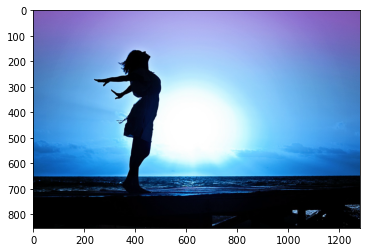

In [3]:
plt.imshow(imagem);

In [4]:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

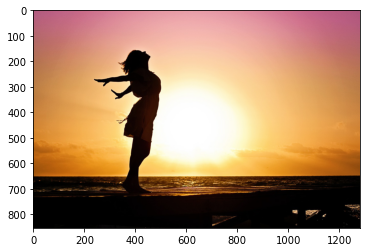

In [5]:
plt.imshow(imagem_rgb);

In [6]:
imagem_rgb.shape

(853, 1280, 3)

In [7]:
imagem_gray = cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2GRAY)

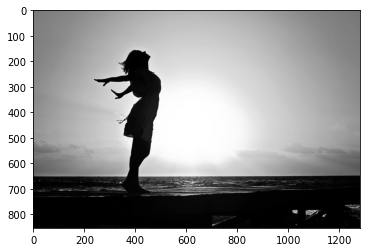

In [8]:
plt.imshow(imagem_gray, cmap="gray");

In [9]:
imagem_gray.shape

(853, 1280)

In [10]:
imagem = cv2.imread("imagens/px-people.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

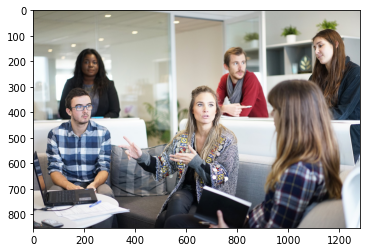

In [11]:
plt.imshow(imagem);

In [12]:
# Recorte manual da imagem
imagen_roi = imagem[100:200, 1000:1200]

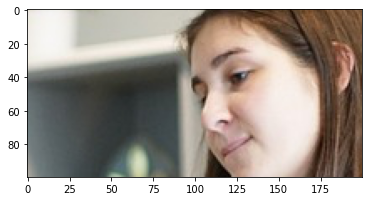

In [13]:
plt.imshow(imagen_roi);

In [14]:
cv2.imwrite("imagens/imagen_roi.png", imagen_roi)

True

In [15]:
# Salvando a imagem
imagen_roi_bgr = cv2.cvtColor(imagen_roi, cv2.COLOR_RGB2BGR)
cv2.imwrite("imagens/imagen_roi_bgr.png", imagen_roi_bgr)

True

### Classificador de cascata de Haar

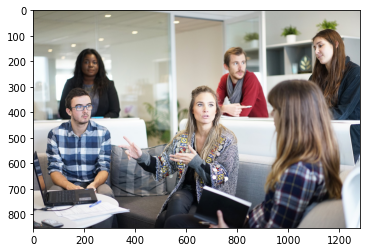

In [22]:
imagem = cv2.imread("imagens/px-people.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem);

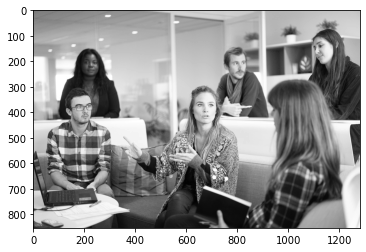

In [23]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
plt.imshow(imagem_gray, cmap="gray");

In [24]:
classificador = cv2.CascadeClassifier("classificadores/haarcascade_frontalface_default.xml")

In [25]:
faces = classificador.detectMultiScale(imagem_gray, 1.3, 5)

In [26]:
len(faces) # número de faces identificadas

5

In [27]:
faces[0] # coordenadas do primeiro rosto

array([189, 176,  75,  75], dtype=int32)

In [28]:
imagem_anotada = imagem.copy()

In [29]:
for (x, y, w, h) in faces:
    cv2.rectangle(imagem_anotada, (x, y), (x + w, y + h), (255, 255, 0), 2)

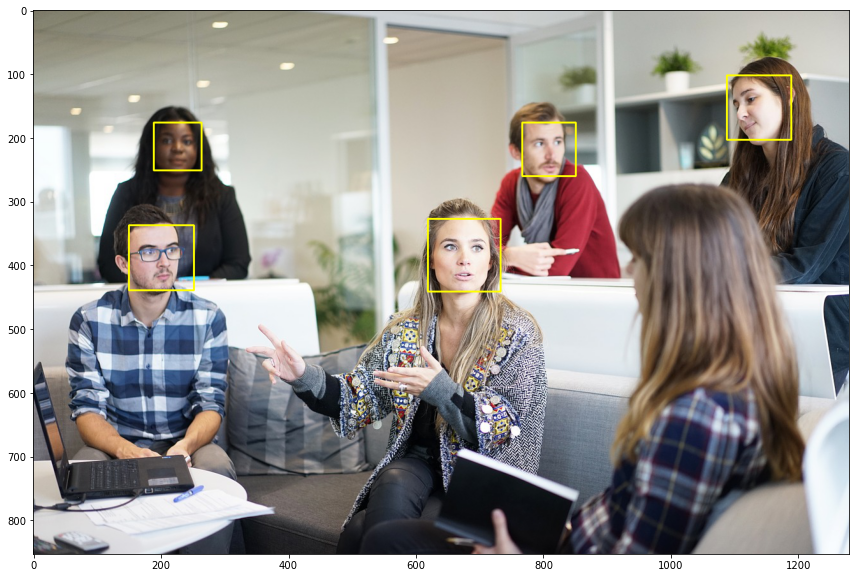

In [30]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada);

In [31]:
# Salvando a imagens
face_imagem = 0

for (x, y, w, h) in faces:
    face_imagem += 1
    imagem_roi = imagem[y:y+h, x:x+w]
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite("imagens/face_" + str(face_imagem) + ".png",imagem_roi)

### Classificação de faces

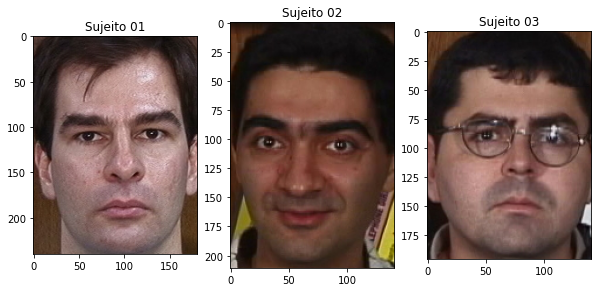

In [44]:
imagem_face_1 = cv2.imread("imagens/cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("imagens/cropped_faces/s02_01.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("imagens/cropped_faces/s03_01.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1)

plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2)

plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3);

In [45]:
imagem_face_1.shape

(241, 181, 3)

In [46]:
imagem_face_2.shape

(211, 141, 3)

In [47]:
imagem_face_3.shape

(196, 141, 3)

In [48]:
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil

faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]
len(lista_arq_faces)

750

In [49]:
# Separação das imagens de treino e teste

faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)
    
if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)
    
for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else: 
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [50]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2. resize(imagem, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [51]:
list_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
list_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [52]:
dados_treinamento, sujeitos = [], []

In [53]:
for i, arq in enumerate(list_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [54]:
len(dados_treinamento)

500

In [55]:
len(sujeitos)

500

In [56]:
dados_teste, sujeitos_teste = [], []

In [57]:
for i, arq in enumerate(list_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [58]:
len(dados_teste)

250

In [59]:
len(sujeitos_teste)

250

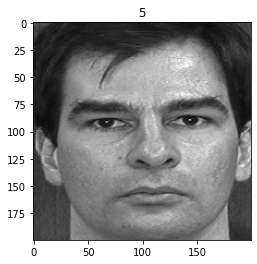

In [60]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0]);

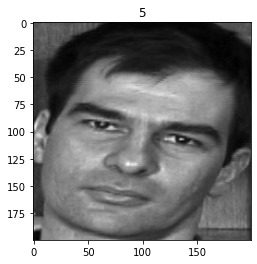

In [61]:
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeito[0]);

### Classificador Eigenfaces

In [100]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [101]:
modelo_eigenfaces = cv2.face.EigenFaceRecognizer_create()

modelo_eigenfaces.train(dados_treinamento, sujeitos)

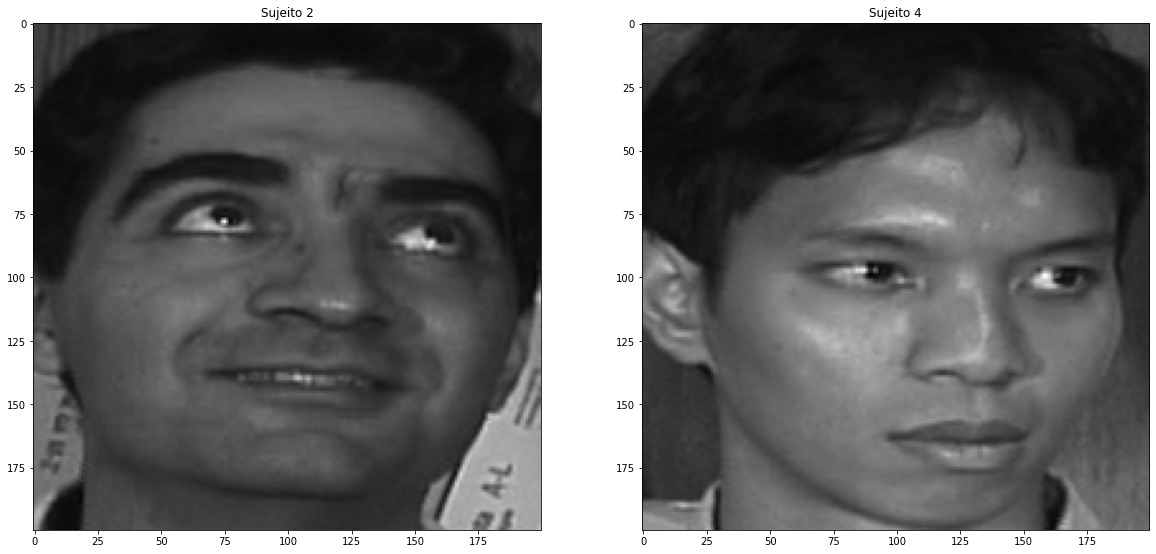

In [106]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[9]))
plt.imshow(dados_teste[9], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[17]))
plt.imshow(dados_teste[17], cmap="gray");

In [108]:
predicao = modelo_eigenfaces.predict(dados_teste[9])
predicao

(2, 4621.047855551894)

In [109]:
predicao = modelo_eigenfaces.predict(dados_teste[17])
predicao

(4, 2934.147499818759)

### Classificador FisherFaces 

In [111]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()
modelo_fisherfaces.train(dados_treinamento, sujeitos)

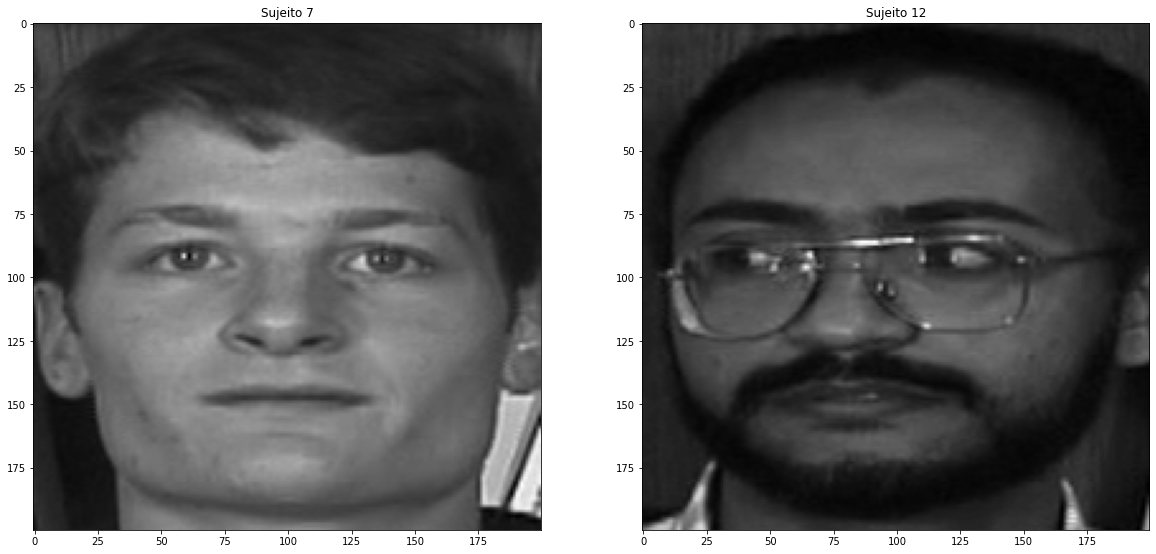

In [118]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[34]))
plt.imshow(dados_teste[34], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[57]))
plt.imshow(dados_teste[57], cmap="gray");

In [119]:
predicao = modelo_fisherfaces.predict(dados_teste[34])
predicao

(7, 1063.6417620557522)

In [120]:
predicao = modelo_fisherfaces.predict(dados_teste[57])
predicao

(12, 802.9002695780193)

### Classificador LBPH

In [124]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()
modelo_lbph.train(dados_treinamento, sujeitos)

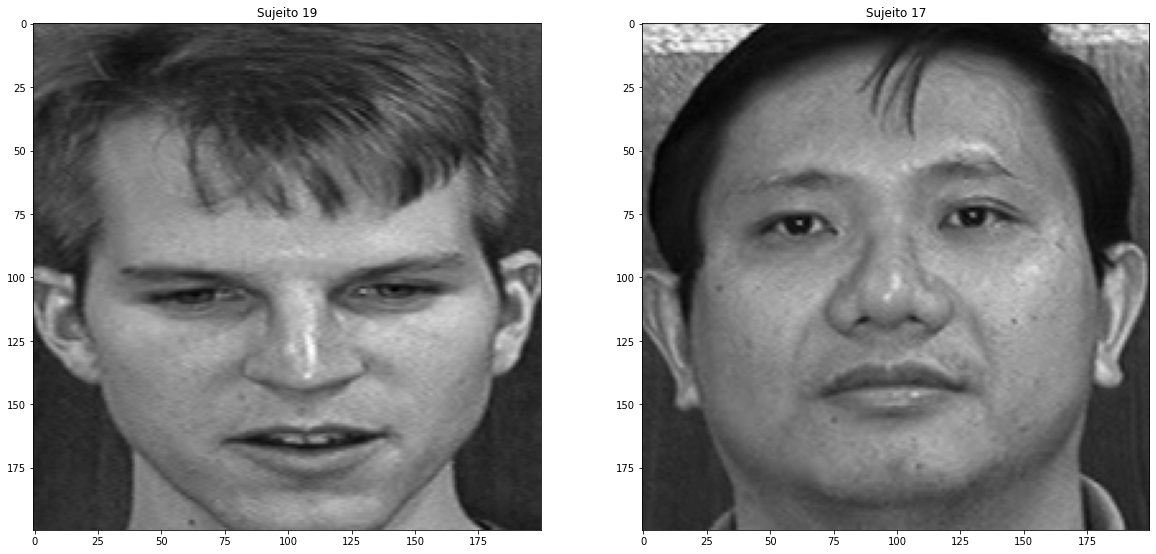

In [128]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[90]))
plt.imshow(dados_teste[90], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[80]))
plt.imshow(dados_teste[80], cmap="gray");

In [129]:
predicao = modelo_lbph.predict(dados_teste[90])
predicao

(19, 35.273039916054174)

In [130]:
predicao = modelo_lbph.predict(dados_teste[80])
predicao

(17, 40.24235709385197)

### Precisão dos Algoritmos

In [131]:
from sklearn.metrics import accuracy_score

In [139]:
# Acurácia Eingenfaces

y_pred_eingenfaces = []

for item in dados_teste:
    y_pred_eingenfaces.append(modelo_eigenfaces.predict(item)[0])
    
acuracia_eigenfaces = accuracy_score(sujeitos_teste, y_pred_eingenfaces)
print("Acurácia do Eingenfaces:", round(acuracia_eigenfaces*100,2), "%")

Acurácia do Eingenfaces: 72.4 %


In [140]:
# Acurácia Fisherfaces 

y_pred_fisherfaces = []

for item in dados_teste:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])
    
acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)
print("Acurácia do Fisherfaces:", round(acuracia_fisherfaces*100,2), "%")

Acurácia do Fisherfaces: 52.0 %


In [141]:
# Acurácia LBPH

y_pred_lbph = []

for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])
    
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)
print("Acurácia do LBPH:", round(acuracia_lbph*100,2), "%")

Acurácia do LBPH: 79.2 %
